In [19]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline

In [20]:
nx = 101
ny = 101
nt = 80
c = 1
dx = 2.0/(nx-1)
dy = 2.0/(ny-1)
sigma = 0.2
dt = sigma*dx


x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u = np.ones((ny, nx))
un = np.ones((ny, nx))

v = np.ones((ny, nx))
vn = np.ones((ny, nx))


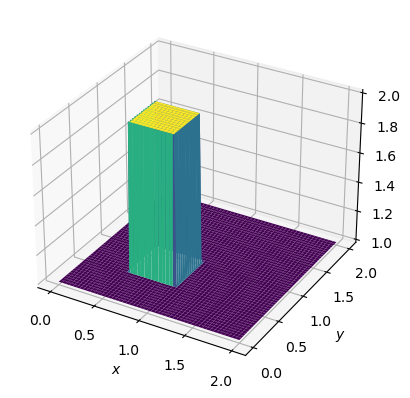

In [21]:
#Initial Conditions

for i in range(nx):
    for j in range(ny):
        if (0.5 <= x[i] <= 1 and 0.5 <= y[j] <= 1):
            u[j, i] = 2
            v[j, i] = 2
        else:
            u[j, i] = 1
            v[j, i] = 1

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
X, Y = np.meshgrid(x, y)
ax.plot_surface(X, Y, u[:], cmap=cm.viridis, rstride=2, cstride=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');


In [22]:
for n in range(nt+1):
    un = u.copy()
    vn = v.copy()
    u[1:, 1:] = (un[1:, 1:] - (un[1:, 1:] * c * dt/dx * (un[1:, 1:] - un[1:, :-1])) - vn[1:, 1:] * c * dt/dy * (un[1:, 1:] - un[:-1, 1:]))
    v[1:, 1:] = (vn[1:, 1:] - (un[1:, 1:] * c * dt/dx * (vn[1:, 1:] - vn[1:, :-1])) - vn[1:, 1:] * c * dt/dy * (vn[1:, 1:] - vn[:-1, 1:]))
    
    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1
    
    v[0, :] = 1
    v[-1, :] = 1
    v[:, 0] = 1
    v[:, -1] = 1

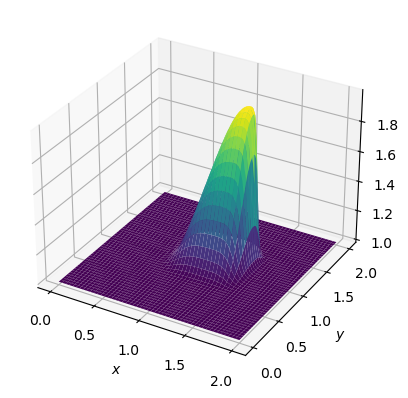

In [26]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
X, Y = np.meshgrid(x, y)
ax.plot_surface(X, Y, u[:], cmap=cm.viridis, rstride=2, cstride=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

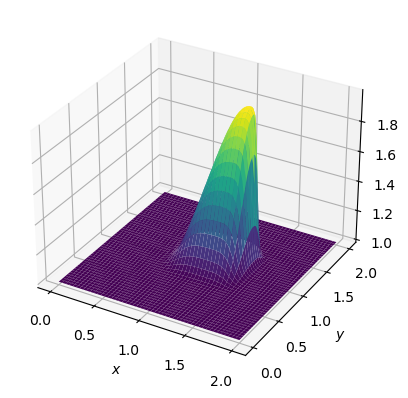

In [24]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
X, Y = np.meshgrid(x, y)
ax.plot_surface(X, Y, v[:], cmap=cm.viridis, rstride=2, cstride=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');